In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)

In [2]:
X,y=mnist["data"],mnist["target"]

In [14]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)

In [6]:
from sklearn import metrics
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn_cls=KNeighborsClassifier()
search_space={
    "weights":['uniform','distance'],
    "n_neighbors":[15,20,30,50]
}
grid_search = GridSearchCV(knn_cls, search_space, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [15, 20, 30, 50],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='neg_mean_squared_error')

In [10]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=15, weights='distance')

In [30]:
knn_cls=KNeighborsClassifier(n_neighbors=4,weights="distance")

In [20]:
y_test_pred=knn_cls.predict(scaler.fit_transform(X_test))

In [21]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_test,y_test_pred)
recall_score(y_test,y_test_pred)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [31]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn_cls, X_train, y_train, cv=3, scoring="accuracy")

array([0.9709 , 0.9698 , 0.97035])

## **Accuracy of 0.97**

In [32]:
import math
import numpy as np
def translate(img,direction):
    trs=img.copy()
    values=trs.values
    x=int(math.sqrt(len(values)))
    values=values.reshape(x,x)
    if direction=="down":
        for i in range(x-1,0,-1):
            values[i]=values[i-1]
        values[0]=np.zeros(x)
    if direction=="up":
        for i in range(x-1):
            values[i]=values[i+1]
        values[x-1]=np.zeros(x)
    if direction=="left":
        for i in range(x-1):
            values[:,i]=values[:,i+1]
        values[:,x-1]=np.zeros((1,x))
    if direction=="right":
        for i in range(x-1,0,-1):
            values[:,i]=values[:,i-1]
        values[:,0]=np.zeros((1,x))
    values.reshape(x**2,1)
    return trs

In [33]:
X_train_up=X_train.apply(lambda x:translate(x,"up"),axis=1)
X_train_down=X_train.apply(lambda x:translate(x,"down"),axis=1)
X_train_left=X_train.apply(lambda x:translate(x,"left"),axis=1)
X_train_right=X_train.apply(lambda x:translate(x,"right"),axis=1)

In [34]:
import matplotlib.pyplot as plt
def display_image(image):
    plt.matshow(image.values.reshape(28,28),cmap=plt.cm.gray)
    plt.axis(False)
    plt.show()

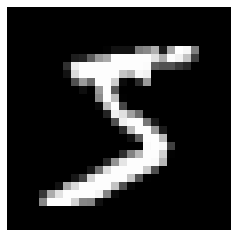

In [35]:
display_image(X_train.iloc[0])

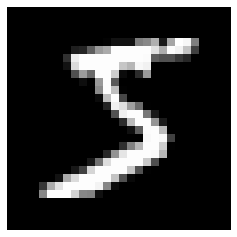

In [36]:
display_image(X_train_up.iloc[0])

In [37]:
import pandas as pd
X_train_extended=pd.concat([X_train,X_train_up,X_train_down,X_train_right,X_train_left],ignore_index=True)

In [40]:
X_train_extended.shape

(300000, 784)

In [43]:
y_train_extended=pd.concat([y_train,y_train,y_train,y_train,y_train],ignore_index=True)

In [44]:
cross_val_score(knn_cls, X_train_extended, y_train_extended, cv=3, scoring="accuracy")

array([0.98414, 0.97835, 0.97134])

## Better!